In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy

# linear

In [14]:
M = 0.5
m = 0.2
F0 = 0.1
F1 = 0.1
I = 0.006
g = 9.8
l = 0.3
dt = 0.01

# M,m,F0,F1,I,g,l,dt = sympy.symbols("M m F0 F1 J g l dt")
e1,e2,e3,e4 = sympy.symbols("e1 e2 e3 e4")


p = I*(M+m)+M*m*l**2 # denominator for the A and B matrices
A = (M+m)*m*g*l/p
B = -F1*(M+m)/p
C = F0*m*l/p
D = -m*l/p
E = -m*m*g*l*l/p
F = F1*m*l/p
G = -F0*(I+m*l*l)/p
H = (I+m*l*l)/p

# p,A,B,C,D,E,F,G,H,dt = sympy.symbols("p A B C D E F G H dt")


kp1 = 133.8
kd1 = 46.67
kp2 = 82.17
kd2 = 80.336

# kp1,kd1,kp2,kd2 = sympy.symbols("kp1 kd1 kp2 kd2")

x_d_r = ( kp1*e1+kd1*e2+A*e1+B*e2-E*D/H*e1-F*D/H*e2-G*D/H*e4-D/H*kd2*e4) / (C + D/H*kp2*dt)
# u = E/H*e1 +F/H*e2+G/H*e4 +(kp2*dt)*x_d_r/H +kd2/H*e4
u = E/H*e1 +F/H*e2+G/H*e4 +kp2*e3/H +kd2/H*e4

e2_d = A*e1+B*e2+C*e4-D*u
e4_d = -kp2*e3 -kd2*e4
x_d_r_d = ( kp1*e2+kd1*e2_d+A*e2+B*e2_d-E*D/H*e2-F*D/H*e2_d-G*D/H*e4_d-D/H*kd2*e4_d) / (C + D/H*kp2*dt)
e3_d = x_d_r_d * dt


j21 = sympy.diff(e2_d,e1)
j22 = sympy.diff(e2_d,e2)
j23 = sympy.diff(e2_d,e3)
j24 = sympy.diff(e2_d,e4)

j31 = sympy.diff(e3_d,e1)
j32 = sympy.diff(e3_d,e2)
j33 = sympy.diff(e3_d,e3)
j34 = sympy.diff(e3_d,e4)



In [15]:
JM = sympy.Matrix([[0, 1, 0, 0],
              [j21,j22,j23,j24],
              [j31,j32,j33,j34],
              [0, 0, -kp2, -kd2]])
JM.eigenvects()

[(-1.00193017057169 - 3.89940273973596*I,
  1,
  [Matrix([
   [0.0462219878930206 - 0.128436346192239*I],
   [-0.54713624443751 - 0.0515538959780917*I],
   [ -0.422236185187293 - 0.38713875017851*I],
   [  0.416614510029834 + 0.42145498063922*I]])]),
 (5.55379657679023e-14 + 1.91440587013337e-63*I,
  1,
  [Matrix([
   [9.47539914089814e-16 - 4.82009810844935e-15*I],
   [5.26244393124412e-29 - 2.67698443744991e-28*I],
   [     -0.163654095016843 + 0.832501915856925*I],
   [       0.167390173614992 - 0.85150720008419*I]])]),
 (-1.00193017057169 + 3.89940273973596*I,
  1,
  [Matrix([
   [ 0.089332147256736 + 0.149178246065035*I],
   [-0.671210634953478 + 0.198875834233886*I],
   [-0.432638293533269 + 0.587641622325459*I],
   [ 0.417179755404294 - 0.629152948978724*I]])]),
 (-34.1497185394265,
  1,
  [Matrix([
   [0.0358224928077394 - 2.35850693738047e-64*I],
   [  -1.22332804676493 - 1.1215896261616e-64*I],
   [ -0.235707432634443 - 7.5568099574948e-65*I],
   [ 0.419347025287271 + 1.44288

In [16]:
JM = np.array([[0, 1, 0, 0],
              [j21,j22,j23,j24],
              [j31,j32,j33,j34],
              [0, 0, -kp2, -kd2]])
np.linalg.eig(np.array(JM, dtype=np.float64))

(array([-3.41497185e+01+0.j        , -1.00193017e+00+3.89940274j,
        -1.00193017e+00-3.89940274j,  3.36572953e-13+0.j        ]),
 array([[ 2.72414419e-02+0.j        , -5.88466646e-02+0.12316427j,
         -5.88466646e-02-0.12316427j,  1.50243626e-14+0.j        ],
        [-9.30287573e-01+0.j        , -4.21306841e-01-0.35286884j,
         -4.21306841e-01+0.35286884j, -3.59421868e-14+0.j        ],
        [-1.79245212e-01+0.j        , -5.72161622e-01-0.0281227j ,
         -5.72161622e-01+0.0281227j , -6.99082041e-01+0.j        ],
        [ 3.18895106e-01+0.j        ,  5.92614504e-01+0.j        ,
          5.92614504e-01-0.j        ,  7.15041467e-01+0.j        ]]))

In [17]:
np.array(JM, dtype=np.float64)

array([[ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 2.45000000e+01, -4.16666667e+00,  2.05425000e+02,
         2.00840000e+02],
       [-6.50952496e+00,  1.17504337e-01,  4.83490878e+01,
         4.72699564e+01],
       [ 0.00000000e+00,  0.00000000e+00, -8.21700000e+01,
        -8.03360000e+01]])

# nonlinear 

In [31]:
import sympy
e1, e2, e3, e4 = sympy.symbols("e1 e2 e3 e4")
# M,m,F0,F1,J,g,l,dt = sympy.symbols("M m F0 F1 J g l dt")

M = .5
m = 0.2
F0 = 0.1
F1 = 0.1
J = 0.006
g = 9.8
l = 0.3
dt = 0.01

kp1 = 147.4
kd1 = 42.98
kp2 = 112.6
kd2 = 75.016

'''kp1 = 133.8
kd1 = 46.67
kp2 = 82.17
kd2 = 80.336'''

p = (M+m)*(J+m*l**2) - m**2*l**2*sympy.cos(e1)**2
p_d = 2*m*m*l*l*sympy.cos(e1)*sympy.sin(e1)*e2

A = p*(kp1*e1+kd1*e2) - F1*(M+m)*e2 + (M+m)*m*g*l*sympy.sin(e1)
A += m*l*sympy.cos(e1)/(J+m*l*l) * (F1*m*l*e2*sympy.cos(e1) -F0*(J+m*l*l)*e4 -m*m*g*l*l*sympy.sin(e1)*sympy.cos(e1))
A += m*l*sympy.cos(e1)*(p/(J+m*l*l)*kd2*e4)

B = F0*m*l*sympy.cos(e1)-p*m*l*sympy.cos(e1)*kp2*dt/(J+m*l*l)


u = 1/(J+m*l*l) * (F1*m*l*e2*sympy.cos(e1) +(J+m*l*l)*m*l*e2*e2*sympy.sin(e1) \
                   -F0*(J+m*l*l)*e4 \
                   -m*m*g*l*l*sympy.sin(e1)*sympy.cos(e1) \
                   +p*kp2*e3 \
                   +p*kd2*e4 )

e1_d = e2
e2_d =  -F1/p*(M+m)*e2 -m*m*l*l/p*e2*e2*sympy.sin(e1)*sympy.cos(e1) +F0*m*l/p*sympy.cos(e1)*e4 +(M+m)*m*g*l/p*sympy.sin(e1) +m*l/p*sympy.cos(e1)*u
e4_d = -kp2*e3-kd2*e4



A_d = p_d*kp1*e1+p*kp1*e2 +p_d*kd1*e2+p*kd1*e2_d -F1*(M+m)*e2_d  +(M+m)*m*g*l*sympy.cos(e1)*e2
A_d += m*l/(J+m*l*l)*( F1*m*l*(e2_d*sympy.cos(e1)*sympy.cos(e1)-e2*2*sympy.cos(e1)*sympy.sin(e1)*e2) \
                      - F0*(J+m*l*l)*(e4_d*sympy.cos(e1)-e4*sympy.sin(e1)*e2) \
                     -m*m*g*l*l*( -sympy.sin(e1)*e2*sympy.sin(2*e1)/2 +sympy.cos(e1)*sympy.cos(2*e1)*e2)  )
A_d += m*l*kd2/(J+m*l*l)*( (p_d*e4+p*e4_d)*sympy.cos(e1) + p*e4*(-sympy.sin(e1))*e2   )

B_d = -F0*m*l*sympy.sin(e1)*e2 - m*l*kp2*dt/(J+m*l*l)*(p_d*sympy.cos(e1)-p*sympy.sin(e1)*e2)

x3_d = (A_d*B-B_d*A)/B/B * dt


#x_d_r = p*(kp1*e1+kd1*e2) - F1*(M+m)*e2 + m*m*l*l*e2*sympy.sin(e1)*sympy.cos(e1) - (M+m)*m*g*l*sympy.sin(e1) + F0*m*l*sympy.cos(e1)*e4
#x_d_r += m*l*sympy.cos(e1)/(J+m*l*l) * (F1*m*l*e2*sympy.cos(e1) +(J+m*l*l)*m*l*e2**2*sympy.sin(e1) -F0*(J+m*l*l)*e4 -m*m*g*l*l*sympy.sin(e1)*sympy.cos(e1))
#x_d_r += m*l*sympy.cos(e1)*(p/(J+m*l*l)*kd2*e4)
#x_d_r /= (F0*m*l*sympy.cos(e1)-p*m*l*sympy.cos(e1)*kp2*dt/(J+m*l*l))

j21 = sympy.diff(e2_d, e1)
j22 = sympy.diff(e2_d, e2)
j23 = sympy.diff(e2_d, e3)
j24 = sympy.diff(e2_d, e4)

j31 = sympy.diff(x3_d, e1)
j32 = sympy.diff(x3_d, e2)
j33 = sympy.diff(x3_d, e3)
j34 = sympy.diff(x3_d, e4)


JM = sympy.Matrix([[0,1,0,0],
                  [j21,j22,j23,j24],
                  [j31,j32,j33,j34],
                  [0,0,-kp2,-kd2]])

In [8]:
JM.evalf(subs={'e1':0, 'e2':0, 'e3':0, 'e4':0})

Matrix([
[                0,               1.0,                0,                0],
[             24.5, -4.16666666666667,          205.425,           200.84],
[-6.50952495962796, 0.117504337132962, 48.3490877860969, 47.2699563877799],
[                0,                 0,           -82.17,          -80.336]])

In [71]:
vec_l = []
val_l = []
for i in range(-5, 6):
    print(i)
    eigenval, eigenvec = np.linalg.eig(np.array(JM.evalf(subs={'e1':i/5, 'e2':i/5, 'e3':i/5, 'e4':i/5}), dtype=np.float64))
    # vec_l.append(np.dot(eigenvec, (abs(eigenval) < 10**(-8)).T))
    vec_l.append(eigenvec[:,1].T)
    val_l.append(eigenval)

-5
-4
-3
-2
-1
0
1
2
3
4
5


In [85]:
eigenval

array([-25.70955849 +0.j        ,  -5.85826646+24.76561819j,
        -5.85826646-24.76561819j,  -0.0636882  +0.j        ])

In [75]:
np.real(np.array(val_l)[:,1])

array([-5.85826646e+00, -4.14007491e+00, -2.92585216e+00, -2.17902218e+00,
       -1.79942388e+00, -4.14115491e-13, -1.79942388e+00, -2.17902218e+00,
       -2.92585216e+00, -4.14007491e+00, -5.85826646e+00])

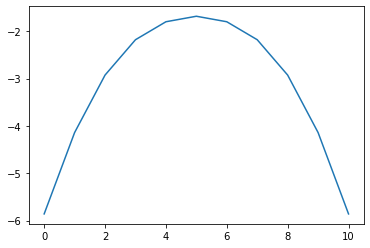

In [83]:
plt.plot(np.real(np.array(val_l)[:,2]))

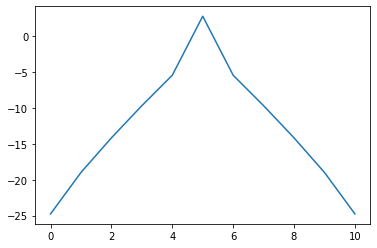

In [84]:
plt.plot(np.imag(np.array(val_l)[:,2]))

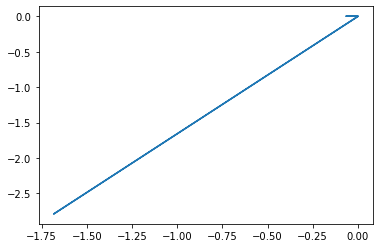

In [80]:
plt.plot(np.real(np.array(val_l)[:,3]), np.imag(np.array(val_l)[:,3]))

In [76]:
val_l

[array([-25.70955849 +0.j        ,  -5.85826646+24.76561819j,
         -5.85826646-24.76561819j,  -0.0636882  +0.j        ]),
 array([-28.85084283 +0.j        ,  -4.14007491+18.98627233j,
         -4.14007491-18.98627233j,  -0.06283997 +0.j        ]),
 array([-30.96281261 +0.j        ,  -2.92585216+14.16408622j,
         -2.92585216-14.16408622j,  -0.04549096 +0.j        ]),
 array([-3.21656134e+01+0.j        , -2.17902218e+00+9.68006068j,
        -2.17902218e+00-9.68006068j, -1.92304676e-02+0.j        ]),
 array([-3.27139206e+01+0.j        , -1.79942388e+00+5.43338763j,
        -1.79942388e+00-5.43338763j,  1.76214324e-03+0.j        ]),
 array([-3.28593272e+01+0.j       , -4.14115491e-13+0.j       ,
        -1.68303364e+00+2.7886207j, -1.68303364e+00-2.7886207j]),
 array([-3.27139206e+01+0.j        , -1.79942388e+00+5.43338763j,
        -1.79942388e+00-5.43338763j,  1.76214324e-03+0.j        ]),
 array([-3.21656134e+01+0.j        , -2.17902218e+00+9.68006068j,
        -2.17902218e+00-

In [10]:
JM.evalf(subs={'e1':0, 'e2':0, 'e3':0, 'e4':0}).eigenvects()

[(-1.00193017057169 - 3.89940273973596*I,
  1,
  [Matrix([
   [0.0462219878930206 - 0.128436346192239*I],
   [-0.54713624443751 - 0.0515538959780921*I],
   [ -0.422236185187293 - 0.38713875017851*I],
   [ 0.416614510029834 + 0.421454980639221*I]])]),
 (5.55017560453664e-14 + 3.97447295180255e-63*I,
  1,
  [Matrix([
   [  9.5125554106823e-16 - 4.838999356095e-15*I],
   [5.27963529771719e-29 - 2.6857296176567e-28*I],
   [    -0.163654095016844 + 0.832501915856925*I],
   [      0.167390173614993 - 0.85150720008419*I]])]),
 (-1.00193017057169 + 3.89940273973596*I,
  1,
  [Matrix([
   [0.0893321472567362 + 0.149178246065035*I],
   [-0.671210634953478 + 0.198875834233887*I],
   [-0.432638293533268 + 0.587641622325459*I],
   [ 0.417179755404294 - 0.629152948978724*I]])]),
 (-34.1497185394265,
  1,
  [Matrix([
   [0.0358224928077394 - 5.86845574914748e-64*I],
   [ -1.22332804676493 - 7.83559110765533e-64*I],
   [-0.235707432634443 - 2.79141624545958e-64*I],
   [ 0.419347025287271 + 5.157503964

In [89]:
import shap
X = []
y1 = []
y2 = []
for h in range(500):
    if h % 10==0:
        print(h/10)
    state = np.random.uniform(low=[-1.5,-5,-2,-3], high=[1.5,5,2,3], size=(4))

    X.append(state)
    eigenval, eigenvec = np.linalg.eig(np.array(JM.evalf(subs={'e1':state[0], 'e2':state[1], 'e3':state[2], 'e4':state[3]}), dtype=np.float64))
    a1, a2 = np.real(eigenval[0]), np.imag(eigenval[0])
    y1.append(a1)
    y2.append(a2)
X = np.array(X)

0.0
1.0
2.0


KeyboardInterrupt: 